# House Price Prediction

This notebook shows the steps to preprocess data to predict house prices given some features and also choose the model to train and predict the result

In [299]:
#importing modules

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [300]:
train = pd.read_csv('train.csv')

In [301]:
train.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,4239400730,152000,3,1.00,1090,3264,1.0,0,0,4,6,1090,0,1969,0,98092,47.3155,-122.182,1090,3330
1,5016001060,650000,2,2.50,1740,2500,2.0,0,2,3,8,1210,530,1994,0,98112,47.6220,-122.300,1640,2500
2,7212650200,350000,3,2.50,2180,15484,1.0,0,0,3,8,2180,0,1992,0,98003,47.2688,-122.309,2090,10775
3,3876312570,350500,3,2.25,1870,7200,1.0,0,0,3,7,1390,480,1975,0,98072,47.7340,-122.174,1830,7876
4,8562901010,505000,2,3.00,2770,10800,1.5,0,0,5,8,1910,860,1984,0,98074,47.6082,-122.057,2140,10800


In [302]:
X = train.drop(['id','price'], axis=1)
y = train['price']

In [303]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.33, random_state = 1)

## A. Feature Selection

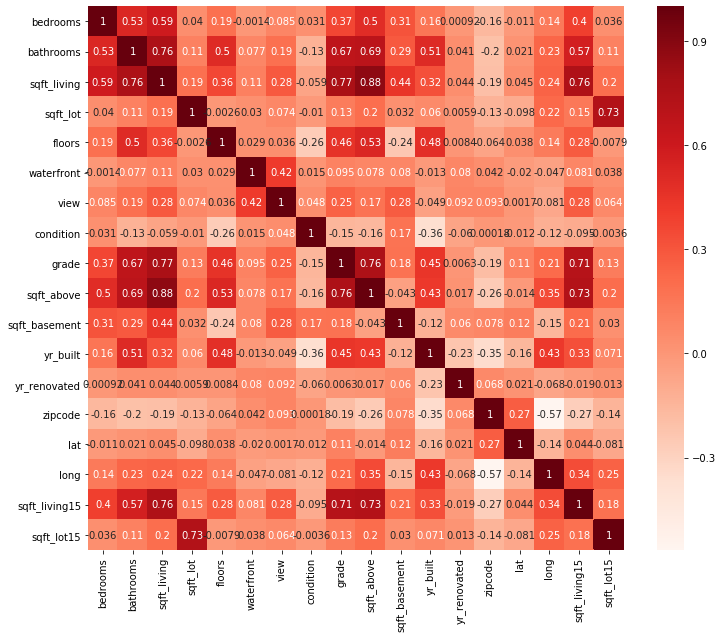

In [304]:
#check correlation between features
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

Remove the features that have high correlation with other features

In [305]:
to_drop = [column for column in cor.columns if any((cor[column]>0.72)&(cor[column]<1))]
X_train_drop = X_train.drop(['sqft_living', 'sqft_lot'],axis=1)
X_val_drop = X_val.drop(['sqft_living', 'sqft_lot'],axis=1)

In [306]:
X_train_drop.shape

(11489, 16)

In [307]:
X_val_drop.shape

(5659, 16)

See if there are any missing values in the data. Turns out there isn't any so we can proceed to the next step

In [308]:
cols_miss = [col for col in X_train_drop.columns
                     if X_train_drop[col].isnull().any()]
cols_miss

[]

Check for categorical features but there isn't any

In [263]:
qual = [f for f in train.columns if train.dtypes[f] == 'object']
len(qual)

0

## Random Forest

In [266]:
#importing libraries
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

Choose random forest regressor as potential model for this data. Set n estimators to 10 to avoid overfitting. Then, train the model on the training data

In [267]:
model_rf = RandomForestRegressor(n_estimators = 10, random_state = 1)
model_rf.fit(X_train_drop, y_train)
y_pred_rf = model_rf.predict(X_val_drop)
y_pred_rf[0:10]

array([ 256300.3,  313185.9, 1275250. ,  651780. ,  635642.3,  216520. ,
        436650. ,  267465. ,  273906.5,  573855. ])

Check the mean error for the first 10 predictions

In [313]:
a = y_val.values
total = 0
for i in range(10):
    total = total + abs(a[i]-y_pred_rf[i])
total/10

40672.76

## Linear Regression

Choose linear regression as potential model for this data. Then, train the model on the training data

In [271]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train_drop, y_train)
y_pred_lr = model_lr.predict(X_val_drop)
y_pred_lr[0:10]

array([ 425094.02576476,  302056.90923876, 1132475.20392284,
        515977.99554641,  620416.02927625,  253054.91604111,
        625607.19166697,  250495.92470927,  291079.65926833,
        638951.06899847])

Check the mean error for the first 10 predictions

In [272]:
total_lr = 0
for i in range(10):
    total_lr = total_lr + abs(a[i]-y_pred_lr[i])
print(total_lr/10)

102797.1857598614


Because the random forest model has lower error value, so we pick it as our model for this prediction

In [309]:
import pickle

In [312]:
filename = 'finalized_model_rf.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

We save our trained model into pickle so that we can call it and use it to make predictions without having to train the model all over again. This will result in a fast prediction